# Learning Curves: Curvas de Aprendizaje

Se denominan **_Learning Curves_** o **_Curvas de Aprendizaje_** a las que se obtienen evaluando el modelo tanto en el train como el test sets con  **cantidades crecientes de observaciones**.  

Generalmente las utilizamos para:  

- determinar si al agregar más observaciones o instancias esperaríamos mejorar la performance del modelo o no.   
- También brindan información para determinar si hay **underfitting** u **overfitting** en el modelo. 

## Learning Curves con Scikit - Learn

Puede encontrar la documentación en : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html

Sintaxis:

~~~
.learning_curve(estimator, X, y, *, groups=None, train_sizes=array([0.1, 0.33, 0.55, 0.78, 1. ]), cv=None, scoring=None, exploit_incremental_learning=False, n_jobs=None, pre_dispatch='all', verbose=0, shuffle=False, random_state=None, error_score=nan, return_times=False)
~~~

Las opciones principales son:  


- **scoring:** Ver referencias en https://scikit-learn.org/stable/modules/model_evaluation.html



En la implementación de sklearn utiliza Cross Validation, primero dividirá los datos (X,y) según la cantidad de folds elegidos en el parámetro cv (por defecto 5) en diversos Train=(X_train, y_train) ,Test=(X_test, y_test) y luego, dentro de cada fold  irá incrementando la cantidad de observaciones que formarán en Train, manteniendo fijo el Test para el mismo fold. 

Veamos un ejemplo:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Los Datos

In [ ]:
# No es necesario que vea este código es sólo para generar los valores de X e y.

m = 200   # cantidad de observaciones
np.random.seed(seed=123)  # para generar siempre los mismos valores de X e y

# Generamos los valores de X e y con un poco de ruido

X = 6 * np.random.rand(m, 1) - 3
y = X**3+5 * X**2 + X + 2 + 2*np.random.randn(m, 1)

### El modelo

Utilizaremos un modelo de Regresión Lineal de primer grado.

In [ ]:
from sklearn.linear_model import LinearRegression
modelo= LinearRegression()

### Calculando las Learning Curves

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
tamanos_train=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]


curvas_aprendizaje = learning_curve(modelo, X, y, 
                                  train_sizes=tamanos_train, 
                                  cv=5,
                                  scoring='neg_root_mean_squared_error',
                                  shuffle=True)

Veamos qué nos ha devuelto:

In [ ]:
curvas_aprendizaje

(array([ 16,  32,  48,  64,  80,  96, 112, 128, 144, 160]),
 array([[-11.59062375, -11.69011225, -13.67051319,  -9.03426283,
         -13.90416268],
        [-15.18924425, -10.11191553, -14.55065837,  -8.6475096 ,
         -15.59685965],
        [-14.00130494, -13.245273  , -14.44094904,  -8.98328379,
         -15.4520673 ],
        [-14.96179607, -13.4599909 , -13.6344339 , -10.76067869,
         -14.78976238],
        [-14.5869293 , -13.5112274 , -13.23701927, -12.4751628 ,
         -14.35417647],
        [-14.10779101, -14.4169115 , -13.61126745, -12.16224712,
         -13.95666402],
        [-13.75418633, -13.96361388, -13.72506733, -12.86267874,
         -13.66790111],
        [-14.03292182, -13.78378387, -13.34313151, -12.85564044,
         -13.92267383],
        [-13.78538472, -13.45511472, -13.30409474, -13.56079336,
         -13.56120609],
        [-13.73692999, -13.58507313, -13.31797528, -13.17063439,
         -13.67300944]]),
 array([[-16.07768583, -13.0763027 , -14.2159716

Veamos qué es cada uno de estos arrays:

#### train_sizes_abs

El primer array corresponde a los sucesivos tamaños del Train que utilizó en cada uno de los folds, es decir la cantidad de observaciones que corresponden a los porcentajes del Train que pasamos en train_sizes=tamanos_train, que en nuestro caso eran   

tamanos_train=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1].  

Nosotros contábamos con 200 observaciones en total, como a su vez habíamos crado 5 folds al pasar cv=5, significa que cada Test Set de cada fold estará compuesto por la quinta parte de todas las observaciones disponibles, es decir por 40 observaciones y las 160 restantes formarán el total de observaciones disponibles para el Train, el cual a su vez dividiremos en [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], para evaluar con el 10%, 20%, ...100% de estas 160 observaciones disponibles, por eso las cantidades del train_size_abs son [16,32,...,160], las podemos obtener como: 

In [ ]:
cantidad_observaciones=curvas_aprendizaje[0]
cantidad_observaciones

array([ 16,  32,  48,  64,  80,  96, 112, 128, 144, 160])

#### train_scores

El segundo array corresponde a las evaluaciones en cada uno de estos train sets en cada fold, la primer fila corresponde a las 5 evaluaciones (una en cada fold) luego de haber entrenado con sólo 16 observaciones y evaluado en esas mismas observaciones, la segunda columna luego de haber entrenado con 32 observaciones y evaluado en ellas mismas, etc.

In [ ]:
train_scores_en_cada_fold=-1*curvas_aprendizaje[1] 
# Multiplicamos por -1 porque sklearn nos da el RMSE con valor negativo
train_scores_en_cada_fold

array([[11.59062375, 11.69011225, 13.67051319,  9.03426283, 13.90416268],
       [15.18924425, 10.11191553, 14.55065837,  8.6475096 , 15.59685965],
       [14.00130494, 13.245273  , 14.44094904,  8.98328379, 15.4520673 ],
       [14.96179607, 13.4599909 , 13.6344339 , 10.76067869, 14.78976238],
       [14.5869293 , 13.5112274 , 13.23701927, 12.4751628 , 14.35417647],
       [14.10779101, 14.4169115 , 13.61126745, 12.16224712, 13.95666402],
       [13.75418633, 13.96361388, 13.72506733, 12.86267874, 13.66790111],
       [14.03292182, 13.78378387, 13.34313151, 12.85564044, 13.92267383],
       [13.78538472, 13.45511472, 13.30409474, 13.56079336, 13.56120609],
       [13.73692999, 13.58507313, 13.31797528, 13.17063439, 13.67300944]])

A nosotros no nos interesan los resultados internos de cada fold, sino el promedio para cada una de las cantidades de observaciones entre todos los folds, así que simplmente podemos promediar los calores de cada fila:

In [ ]:
train_scores=np.mean(train_scores_en_cada_fold, axis=1)
train_scores

array([11.97793494, 12.81923748, 13.22457561, 13.52133239, 13.63290305,
       13.65097622, 13.59468948, 13.58763029, 13.53331873, 13.49672445])

Ahora cada uno de los 10 elementos corresponde a cada una de las cantidades de observaciones que utilizamos para entrenar y evaluar, el primero con 16, el segundo con 32 y así suecesivamente.

#### test_scores

El tercer array que nos da, corresponde a los resultados obtenidos en cada fold al entrenar en cada uno de los sucesivos Train y al evaluar en el único Test Set de ese fold. Es similar al anterior, pero en este caso la evaluación se efectuó en el Test set en vez del mismo train.

In [ ]:
test_scores_en_cada_fold=-1* curvas_aprendizaje[2]
# Multiplicamos por -1 porque sklearn nos da el RMSE con valor negativo
test_scores_en_cada_fold

array([[16.07768583, 13.0763027 , 14.21597165, 16.23411489, 12.63968318],
       [13.40780127, 13.34085519, 14.28946223, 16.99185197, 14.92496779],
       [13.38400567, 13.08490505, 14.26337454, 16.90482252, 15.52791078],
       [13.54806626, 13.16878814, 14.42916474, 16.66749592, 15.71168   ],
       [12.97477342, 13.41546645, 14.26638739, 15.29906117, 14.87975536],
       [13.09064016, 13.90218879, 14.19907162, 15.87587521, 13.96325862],
       [12.93764173, 13.60574435, 14.21619225, 15.46626117, 13.83709556],
       [12.932967  , 13.47502256, 14.26905753, 15.16991178, 13.79518376],
       [12.66040305, 13.26828347, 14.35708019, 14.91569181, 13.50551075],
       [12.72797012, 13.34548659, 14.35088646, 15.04036344, 13.12362494]])

Nuevamente a nosotros no nos interesan los resultados internos de cada fold, sino el promedio para la misma cantidad de observaciones utilizadas para entrenar, así que nuevamente podemos promediar por columna:

In [ ]:
test_scores=np.mean(test_scores_en_cada_fold, axis=1)
test_scores

array([14.44875165, 14.59098769, 14.63300371, 14.70503901, 14.16708876,
       14.20620688, 14.01258701, 13.92842853, 13.74139385, 13.71766631])

#### Guardando todo en un DataFrame
Por supuesto que podríamos guardar toda esta info en un DataFrame:

In [ ]:
df_learning_curves1=pd.DataFrame()
df_learning_curves1['cantidad_observaciones']=cantidad_observaciones
df_learning_curves1['train_RMSE']=train_scores
df_learning_curves1['test_RMSE']=test_scores
    

df_learning_curves1

,cantidad_observaciones,train_RMSE,test_RMSE
0,16,11.977935,14.448752
1,32,12.819237,14.590988
2,48,13.224576,14.633004
3,64,13.521332,14.705039
4,80,13.632903,14.167089
5,96,13.650976,14.206207
6,112,13.594689,14.012587
7,128,13.587630,13.928429
8,144,13.533319,13.741394
9,160,13.496724,13.717666


Ahora sí estamos en condiciones de graficar las Learning Curves!

### Graficando las Learning Curves

''

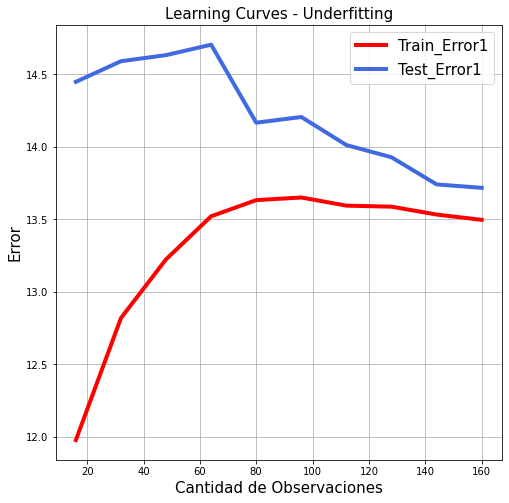

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

plt.title("Learning Curves - Underfitting", size=15)

axes.plot(df_learning_curves1['cantidad_observaciones'],df_learning_curves1['train_RMSE'], "red",  linewidth=4,label="Train_Error1")
axes.plot(df_learning_curves1['cantidad_observaciones'],df_learning_curves1['test_RMSE'], "royalblue",  linewidth=4, label="Test_Error1")

axes.grid(True)
axes.legend(loc="upper right",fontsize=15)
axes.set_xlabel('Cantidad de Observaciones', size=15)
axes.set_ylabel('Error', size=15)
;

### Análisis:

Observamos que ambas curvas tienden a converger hacia un valor de alrededor de aproximadamente 13.6. Nuestra pregunta es: éste es un valor bueno o malo?  

Este valor debería haberse definido al principio del experimento, pero tengamos en cuenta que el promedio de los valores de y es {{round(np.mean(y),3)}}

In [ ]:
np.mean(y)

14.410201822830867

y por lo tanto un RMSE de alrededor de 13 es claramente inaceptable!

#### Explicación: 

> Cuando en las learning curves el Error en el Train y en el Test convergen hacia un valor alto de Error, y además su gap es relativemente pequeño, estamos en presencia de **High Bias Error** y **underfitting**.

> Así se manifiestan estos elementos en las Learning Curves.

## Qué hubiera pasado con un modelo con más grados de libertad?

Vamos a trabajar con los mismos datos, pero en vez de usar un modelo de regresión lineal de primer grado, usaremos uno de mayor grado, por ejemplo 15,  para ello vamos a tenne que generar las distintas potencias de X, hasta la potencia 15.

### Los datos

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
potencia=15
poly = PolynomialFeatures(potencia, include_bias=False)
X_poly=poly.fit_transform(X)

In [ ]:
X2=X_poly
# y seguirá siendo la misma y

### El modelo

Es el mismo de antes

### Curvas de Aprendizaje

Igual que antes pero debemos pasar X_poly en vez de X

In [ ]:
curvas_aprendizaje15=learning_curve(modelo, X_poly, y, 
                                  train_sizes=tamanos_train, 
                                  cv=5,
                                  scoring='neg_root_mean_squared_error',
                                  shuffle=True)

In [ ]:
curvas_aprendizaje15

(array([ 16,  32,  48,  64,  80,  96, 112, 128, 144, 160]),
 array([[-1.82811969e-08, -2.55499357e-08, -7.80699277e-08,
         -1.11089435e-07, -5.84525923e-07],
        [-1.03836237e+00, -1.28376988e+00, -1.44954167e+00,
         -1.14915857e+00, -1.27159933e+00],
        [-1.19027598e+00, -1.33331584e+00, -1.75642353e+00,
         -1.51649504e+00, -1.56436582e+00],
        [-1.52975614e+00, -1.87997231e+00, -1.90275657e+00,
         -1.49081823e+00, -1.70970051e+00],
        [-1.57934023e+00, -1.89449301e+00, -1.87734070e+00,
         -1.54283817e+00, -1.68472344e+00],
        [-1.57082386e+00, -1.86238739e+00, -1.76200386e+00,
         -1.65608732e+00, -1.77103588e+00],
        [-1.75834808e+00, -1.76403943e+00, -1.75992696e+00,
         -1.74896881e+00, -1.80305229e+00],
        [-1.79063376e+00, -1.73662131e+00, -1.81915829e+00,
         -1.73648170e+00, -1.77612574e+00],
        [-1.79205467e+00, -1.76602376e+00, -1.79408078e+00,
         -1.80667937e+00, -1.75272714e+00],
    

In [ ]:
train_scores_en_cada_fold15=-1*curvas_aprendizaje15[1] 
train_scores15=np.mean(train_scores_en_cada_fold15, axis=1)

test_scores_en_cada_fold15=-1*curvas_aprendizaje15[2] 
test_scores15=np.mean(test_scores_en_cada_fold15, axis=1)


df_learning_curves15=pd.DataFrame()
df_learning_curves15['cantidad_observaciones']=cantidad_observaciones
df_learning_curves15['train_RMSE']=train_scores15
df_learning_curves15['test_RMSE']=test_scores15
    

df_learning_curves15

,cantidad_observaciones,train_RMSE,test_RMSE
0,16,1.635033e-07,2.544861e+08
1,32,1.238486e+00,1.646548e+04
2,48,1.472175e+00,4.124745e+03
3,64,1.702601e+00,5.166585e+02
4,80,1.715747e+00,1.650462e+01
5,96,1.724468e+00,5.942908e+00
6,112,1.766867e+00,2.154404e+00
7,128,1.771804e+00,2.092930e+00
8,144,1.782313e+00,2.089759e+00
9,160,1.791818e+00,2.143696e+00


### Graficando

Text(0, 0.5, 'Error')

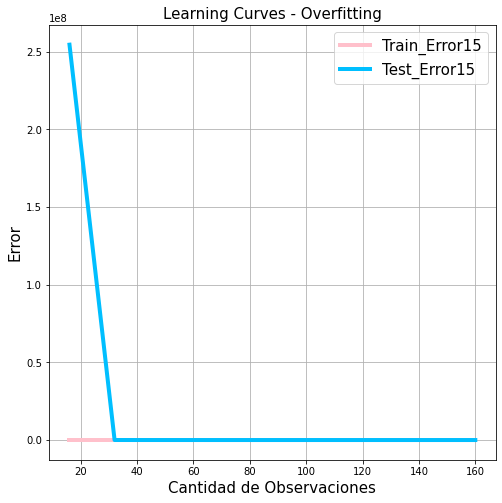

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
plt.title("Learning Curves - Overfitting", size=15)

axes.plot(df_learning_curves15['cantidad_observaciones'],df_learning_curves15['train_RMSE'], "pink", linewidth=4, label="Train_Error15")
axes.plot(df_learning_curves15['cantidad_observaciones'],df_learning_curves15['test_RMSE'], "deepskyblue", linewidth=4, label="Test_Error15")

axes.grid(True)
axes.legend(loc="upper right",fontsize=15)
axes.set_xlabel('Cantidad de Observaciones', size=15)
axes.set_ylabel('Error', size=15)


Quizá el gráfico se va un poco desfigurado por la desproporción que hay en la zona izquierda, obvémosla:

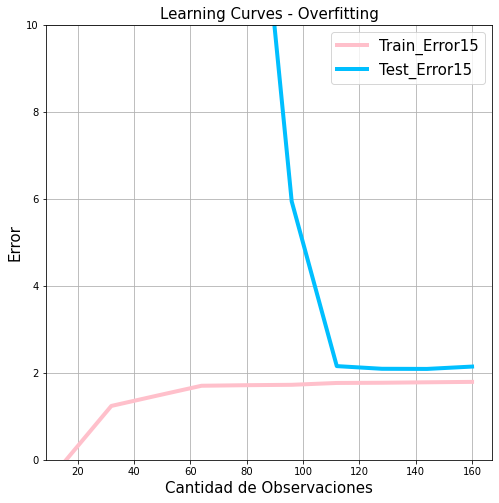

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
plt.title("Learning Curves - Overfitting", size=15)
axes.plot(df_learning_curves15['cantidad_observaciones'],df_learning_curves15['train_RMSE'], "pink", linewidth=4, label="Train_Error15")
axes.plot(df_learning_curves15['cantidad_observaciones'],df_learning_curves15['test_RMSE'], "deepskyblue", linewidth=4, label="Test_Error15")

axes.grid(True)
axes.legend(loc="upper right",fontsize=15)
axes.set_xlabel('Cantidad de Observaciones', size=15)
axes.set_ylabel('Error', size=15)
plt.ylim(0, 10);

## Análisis 

Podmeos observar que las dos curvas también tienden a converger, pero esta vez a **un valor de Error mucho menor**:

> Cuando en las Learning Curves los errores en el Train y Test convergen, pero a un valor más bajo y el gap entre ellos es mayor, estamos en presencia de **High Variance** y **overfitting**.

### Comparación de las dos situaciones

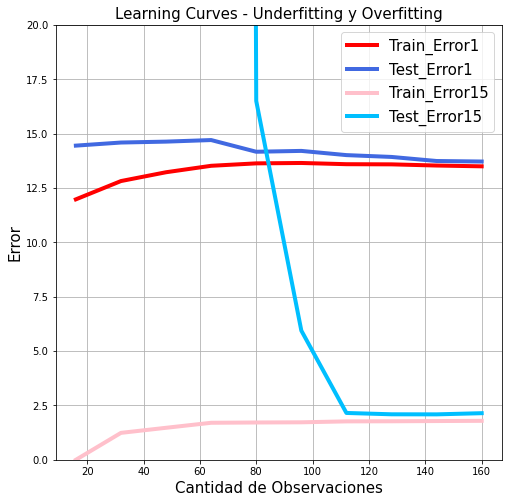

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

plt.title("Learning Curves - Underfitting y Overfitting", size=15)
axes.plot(df_learning_curves1['cantidad_observaciones'],df_learning_curves1['train_RMSE'], "r", linewidth=4, label="Train_Error1")
axes.plot(df_learning_curves1['cantidad_observaciones'],df_learning_curves1['test_RMSE'], "royalblue", linewidth=4, label="Test_Error1")

axes.plot(df_learning_curves15['cantidad_observaciones'],df_learning_curves15['train_RMSE'], "pink", linewidth=4, label="Train_Error15")
axes.plot(df_learning_curves15['cantidad_observaciones'],df_learning_curves15['test_RMSE'], "deepskyblue", linewidth=4, label="Test_Error15")

axes.grid(True)
axes.legend(loc="upper right",fontsize=15)
axes.set_xlabel('Cantidad de Observaciones', size=15)
axes.set_ylabel('Error', size=15)

plt.ylim(0, 20);

En la última figura se observan más claramente las dos situaciones:  
    
> Si las curvas de error del Train y el Test convergen a un valor alto de error y la diferencia entre ellas es pequeña, estamos en presencia de **High Bias** y **underfitting**, en esta situción no tiene sentido seguir agregando observaciones porque como se ve el error se estabilizará en un valor alto. 

> Si las curvas de error del Train y el Test se acercan en un valor bajo de error y la diferencia entre ellas es mayor que en el caso anterior, estamos en presencia de **High Variance** y **overfitting**, es posible que agregando más observaciones el error en el train tienda a disminuir más, por lo cual **se justifica agregar más observaciones** (fíjese la enorme diferencia que hay entre ambos errores para menos de unas 100 observaciones y cómo mejora la performance en el Test al aumentar la cantidad de observaciones). 


In [ ]:
df_learning_curves15['test_RMSE']-df_learning_curves15['train_RMSE']

0    2.544861e+08
1    1.646424e+04
2    4.123273e+03
3    5.149559e+02
4    1.478887e+01
5    4.218440e+00
6    3.875368e-01
7    3.211256e-01
8    3.074456e-01
9    3.518783e-01
dtype: float64

In [ ]:
df_learning_curves1['test_RMSE']-df_learning_curves1['train_RMSE']

0    2.470817
1    1.771750
2    1.408428
3    1.183707
4    0.534186
5    0.555231
6    0.417898
7    0.340798
8    0.208075
9    0.220942
dtype: float64

> La diferencia  entre la tendencia del  Train y el Test  es mayor en caso de High Variance que en el de High Bias. 

## Bias vs Variance con Cross Validation

Qué hubiéramos visto en el modelo óptimo que solemos elegir?

Nosotros estamos acostumbrados a utilizar alguna procedimiento como 1 fold - Cross Validation, Cross Validation "dejando afuera el Test" o "Nested Cross Validation" cuando deseamos seleccionar, algoritmo, hiperparámetros y efectuar la evaluacióón. En nuestro caso considerando sólo el algoritmo de Regresión Lineal, obtuvimos que el mejor modelo de Regresión Lineal para este dataset era con potencia 3, veamos qué hubiera pasado con las Learning Curves:

In [ ]:
potencia=3
poly3 = PolynomialFeatures(potencia, include_bias=False)
X_poly3=poly3.fit_transform(X)

X3=X_poly3
# y seguirá siendo la misma y

curvas_aprendizaje3=learning_curve(modelo, X_poly3, y, 
                                  train_sizes=tamanos_train, 
                                  cv=5,
                                  scoring='neg_root_mean_squared_error',
                                  shuffle=True)

train_scores_en_cada_fold3=-1*curvas_aprendizaje3[1] 
train_scores3=np.mean(train_scores_en_cada_fold3, axis=1)

test_scores_en_cada_fold3=-1*curvas_aprendizaje3[2] 
test_scores3=np.mean(test_scores_en_cada_fold3, axis=1)


df_learning_curves3=pd.DataFrame()
df_learning_curves3['cantidad_observaciones']=cantidad_observaciones
df_learning_curves3['train_RMSE']=train_scores3
df_learning_curves3['test_RMSE']=test_scores3
    

df_learning_curves3

,cantidad_observaciones,train_RMSE,test_RMSE
0,16,1.673448,3.435269
1,32,1.723415,2.014061
2,48,1.721604,1.953069
3,64,1.790977,1.958141
4,80,1.822396,1.945869
5,96,1.848977,1.933877
6,112,1.880362,1.939027
7,128,1.897940,1.933490
8,144,1.892727,1.926910
9,160,1.896406,1.919920


''

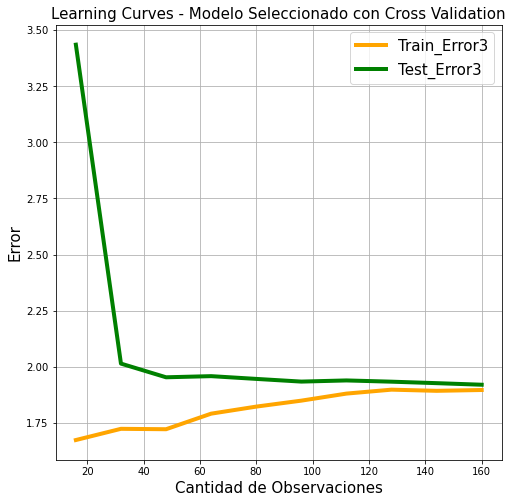

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
plt.title("Learning Curves - Modelo Seleccionado con Cross Validation", size=15)

axes.plot(df_learning_curves3['cantidad_observaciones'],df_learning_curves3['train_RMSE'], "orange", linewidth=4, label="Train_Error3")
axes.plot(df_learning_curves3['cantidad_observaciones'],df_learning_curves3['test_RMSE'], "green", linewidth=4, label="Test_Error3")

axes.grid(True)
axes.legend(loc="upper right",fontsize=15)
axes.set_xlabel('Cantidad de Observaciones', size=15)
axes.set_ylabel('Error', size=15)
;

Observe que el error es menor que el obtenido en ambos casos anteriores e inclusive la tendencia de la curva del Test_Error3 es ligereamente decreciente, lo cual indica que si siguiéramos agregando observaciones posiblemente el aprendizaje mejorara aún  más.

Veámoslas todas juntas:

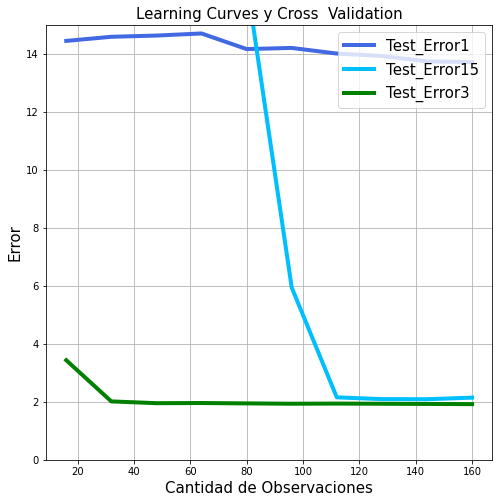

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

plt.title("Learning Curves y Cross  Validation", size=15)
#axes.plot(df_learning_curves1['cantidad_observaciones'],df_learning_curves1['train_RMSE'], "r", linewidth=4, label="Train_Error1")
axes.plot(df_learning_curves1['cantidad_observaciones'],df_learning_curves1['test_RMSE'], "royalblue", linewidth=4, label="Test_Error1")

#axes.plot(df_learning_curves15['cantidad_observaciones'],df_learning_curves15['train_RMSE'], "pink", linewidth=4, label="Train_Error15")
axes.plot(df_learning_curves15['cantidad_observaciones'],df_learning_curves15['test_RMSE'], "deepskyblue", linewidth=4, label="Test_Error15")

#axes.plot(df_learning_curves3['cantidad_observaciones'],df_learning_curves3['train_RMSE'], "orange", linewidth=4, label="Train_Error3")
axes.plot(df_learning_curves3['cantidad_observaciones'],df_learning_curves3['test_RMSE'], "green", linewidth=4, label="Test_Error3")

axes.grid(True)
axes.legend(loc="upper right",fontsize=15)
axes.set_xlabel('Cantidad de Observaciones', size=15)
axes.set_ylabel('Error', size=15)

plt.ylim(0, 15);

#### Conclusión:

> Observe cómo los procesos de "Cross Validation" en general son  muy útiles para optimizar entre **Bias vs Variance** y **underfitting vs overfitting** dejándonos un modelo "listo para agregar más observaciones".

## Learning Curves con mlextend  

La librería mlextend incorpora la posibilidad de graficar las learning curves, con menos código.

Documentación: http://rasbt.github.io/mlxtend/user_guide/plotting/plot_learning_curves/  

No sabemos cómo lo implementa. 

Utilicemos el código de ejemplo provisto en el sitio:

Lamentablemente no calcula el RMSE sino el MSE, pero la información es en esencia la misma que hemos generado con anterioridad. 

Probémoslo con Regresión Lineal con polinomio de 1er grado:

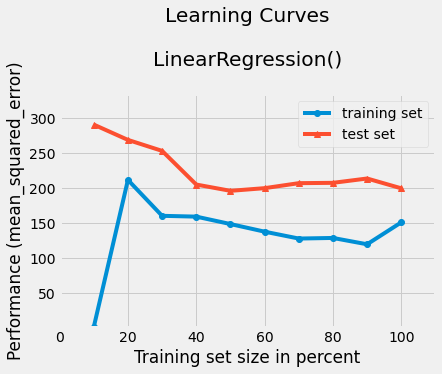

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves

from mlxtend.data import iris_data
from mlxtend.preprocessing import shuffle_arrays_unison

porcentaje_test_set=0.8
cantidad_train=int((1-porcentaje_test_set)*len(y))

X2, y2 = shuffle_arrays_unison(arrays=[X, y], random_seed=123)
X_train, X_test = X[:cantidad_train], X[cantidad_train:]
y_train, y_test = y[:cantidad_train], y[cantidad_train:]

modelo= LinearRegression()

plot_learning_curves(X_train, y_train, X_test, y_test, modelo, scoring='mean_squared_error')
plt.show()

Como podemos ver los resultados no son idénticos a los obtenidos conn anterioridad pero son muy similares.